In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ride_data = pd.read_csv("UberDataset.csv", parse_dates=True)

In [3]:
ride_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
ride_data.shape

(1156, 7)

In [5]:
ride_data.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [6]:
ride_data.describe(include='all')

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
count,1156,1155,1155,1155,1155,1156.000000,653
unique,1155,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


In [7]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
# Converting data types
ride_data['START_DATE'] = pd.to_datetime(ride_data['START_DATE'],format="%m/%d/%Y %H:%M",errors='coerce')
ride_data['END_DATE'] = pd.to_datetime(ride_data['END_DATE'],format="%m/%d/%Y %H:%M",errors='coerce')

In [9]:
ride_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  734 non-null    datetime64[ns]
 1   END_DATE    735 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [10]:
# Checking for duplicates
ride_data[ride_data.duplicated()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
71,NaT,NaT,Business,Cary,Cary,1.6,Meal/Entertain
185,NaT,NaT,Business,Cary,Durham,10.4,Meeting
207,NaT,NaT,Business,Cary,Morrisville,8.4,Meeting
309,NaT,NaT,Business,Whitebridge,Edgehill Farms,2.8,Errand/Supplies
394,NaT,NaT,Business,Cary,Durham,10.4,Meeting
404,NaT,NaT,Business,Morrisville,Cary,2.5,Meal/Entertain
405,NaT,NaT,Business,Cary,Durham,9.9,Meeting
406,NaT,NaT,Business,Durham,Cary,9.9,Meeting
411,NaT,NaT,Business,Cary,Durham,10.4,Meeting
412,NaT,NaT,Business,Durham,Cary,9.9,Meeting


In [11]:
# Dropping duplicated row
ride_data.drop_duplicates(inplace=True)

In [12]:
# Checking for nulls
ride_data.isnull().sum()

START_DATE    380
END_DATE      379
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       500
dtype: int64

In [13]:
# Filling unknown for purpose
ride_data["PURPOSE"] = ride_data["PURPOSE"].fillna("Unknown")
ride_data.dropna(inplace = True)

In [14]:
ride_data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

#### Dealing with features

In [15]:
ride_data["YEAR"] = ride_data['START_DATE'].dt.year
ride_data["MONTH"] = ride_data['START_DATE'].dt.month_name()
ride_data["DAY"] = ride_data['START_DATE'].dt.day_name()
ride_data['START_HOUR'] = ride_data['START_DATE'].dt.hour
ride_data["DURATION"] = (ride_data['END_DATE'] - ride_data['START_DATE']) / pd.Timedelta(minutes=1)


time_periods = [0,6,12,18,24]
labels = ['Night' , 'Morning' , 'Afternoon' , 'Evening']
ride_data['TimeOfDay'] = pd.cut(ride_data['START_DATE'].dt.hour , bins = time_periods , labels = labels , right = False)

In [16]:
ride_data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,YEAR,MONTH,DAY,START_HOUR,DURATION,TimeOfDay
23,2016-01-13 13:54:00,2016-01-13 14:07:00,Business,Downtown,Gulfton,11.2,Meeting,2016,January,Wednesday,13,13.0,Afternoon
24,2016-01-13 15:00:00,2016-01-13 15:28:00,Business,Gulfton,Downtown,11.8,Meeting,2016,January,Wednesday,15,28.0,Afternoon
25,2016-01-14 16:29:00,2016-01-14 17:05:00,Business,Houston,Houston,21.9,Customer Visit,2016,January,Thursday,16,36.0,Afternoon
26,2016-01-14 21:39:00,2016-01-14 21:45:00,Business,Eagan Park,Jamestown Court,3.9,Errand/Supplies,2016,January,Thursday,21,6.0,Evening
27,2016-01-15 00:41:00,2016-01-15 01:01:00,Business,Morrisville,Cary,8.0,Errand/Supplies,2016,January,Friday,0,20.0,Night


### Analysis based on 'Purpose'

In [17]:
purpose_distribution = ride_data['PURPOSE'].value_counts()
print("Purpose Distribution:")
print(purpose_distribution)

Purpose Distribution:
Unknown            342
Meeting            105
Meal/Entertain      96
Errand/Supplies     81
Customer Visit      55
Temporary Site      36
Between Offices      9
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64


Observation : 

- "Unknown" is the most common purpose, indicates that most of the number of rides are not specified or categorized.

- The top identified purposes include "Meeting," "Meal/Entertain," "Errand/Supplies," and "Customer Visit."

- "Commute" and "Charity" purposes have only one recorded trip each. (We will dop these columns as they would not contribute much to the analysis)

In [18]:
# Dropping 'commute' and 'Charity'
purposes_to_drop = ['Commute' , 'Charity ($)']

# Dropping rows with specified purposes
ride_data = ride_data[~ride_data['PURPOSE'].isin(purposes_to_drop)]

ride_data['PURPOSE'].unique()

array(['Meeting', 'Customer Visit', 'Errand/Supplies', 'Meal/Entertain',
       'Unknown', 'Temporary Site', 'Between Offices', 'Moving',
       'Airport/Travel'], dtype=object)

In [19]:
descriptive_stats_by_purpose = ride_data.groupby('PURPOSE')['MILES'].describe()
print("Descriptive Statistics on Miles Covered grouped by Purpose:")
print(descriptive_stats_by_purpose)

Descriptive Statistics on Miles Covered grouped by Purpose:
                 count       mean        std  min    25%   50%     75%    max
PURPOSE                                                                      
Airport/Travel     3.0   5.500000   1.852026  4.1  4.450   4.8   6.200    7.6
Between Offices    9.0  10.955556  11.356838  1.9  4.800   6.1  12.400   39.2
Customer Visit    55.0  22.401818  47.994292  0.8  5.350   7.7  13.550  310.3
Errand/Supplies   81.0   3.880247   3.108312  0.5  1.700   3.1   4.700   18.5
Meal/Entertain    96.0   6.221875   5.979213  0.6  2.500   4.4   7.775   36.5
Meeting          105.0  16.398095  27.094603  0.7  7.500  10.4  14.000  201.0
Moving             4.0   4.550000   1.181807  3.3  3.900   4.4   5.050    6.1
Temporary Site    36.0  11.530556   8.739657  1.8  5.975   8.2  13.950   48.2
Unknown          342.0  10.999123  22.294058  0.7  2.600   5.5  12.100  195.9


Observation

- "Customer Visit" , "Meeting" , "Temperory Site" are the top identified purposes with regard to average duration.

- "Errand/Supplies" and "Moving" have relatively lower average mileage , indicating shorter trips.

- "Customer Visit" and "Meeting" purposes have the highest standard deviation , suggesting greater variability in trip distances.

In [20]:
# Grouping the data by purpose and time of day 
grouped_data = ride_data.groupby(['PURPOSE','TimeOfDay'])

# Calculating the number of trips for each purpose and time of day
trip_counts = grouped_data['PURPOSE'].count()

# Calculating the average trip duration for each purpose and time of day
avg_duration = grouped_data['DURATION'].mean()

# Calculating the average distance travelled for each purpose and time of day
avg_distance = grouped_data['MILES'].mean()

# Printing the results
print("Number of Trips by Purpose and Time of Day : ")
print(trip_counts.unstack())

print("\nAverage Trip Duration by Purpose and Time of Day : ")
print(avg_duration.unstack())

print("\nAverage Distance Traveled by Purpose and Time of Day:")
print(avg_distance.unstack())

Number of Trips by Purpose and Time of Day : 
TimeOfDay        Night  Morning  Afternoon  Evening
PURPOSE                                            
Airport/Travel       0        1          2        0
Between Offices      1        2          4        2
Customer Visit       2       11         24       18
Errand/Supplies      5       10         44       22
Meal/Entertain       2       22         33       39
Meeting              2       26         51       26
Moving               0        4          0        0
Temporary Site       0        9         19        8
Unknown              8       80        169       85

Average Trip Duration by Purpose and Time of Day : 
TimeOfDay        Night    Morning  Afternoon    Evening
PURPOSE                                                
Airport/Travel     NaN  29.000000  24.500000        NaN
Between Offices   20.0  59.000000  11.500000  22.000000
Customer Visit    34.5  25.272727  50.666667  19.888889
Errand/Supplies   11.2  17.500000  13.386364  11.

Observation :

"Meeting" and "Meal/Entertain" purposes have higher trip counts during the "Afternoon" and "Evening" time periods.

"Meal/Entertain" and "Errand/Supplies" purposes have relatively higher trip counts during the "Morning" and "Afternoon" time periods.

The average trip duration varies across purposes and time of day. "Customer Visit" and "Meeting" purposes have longer average durations, particularly during the "Afternoon" and "Evening" time periods.

In [21]:
# Grouping the data by purpose and day of the week
grouped_data = ride_data.groupby(['PURPOSE', 'DAY'])

# Calculating the number of trips for each purpose and day of the week
trip_counts = grouped_data['PURPOSE'].count().unstack().fillna(0)

# Calculating the average trip duration for each purpose and day of the week
avg_duration = grouped_data['DURATION'].mean().unstack().fillna(0)

# Calculating the average distance traveled for each purpose and day of the week
avg_distance = grouped_data['MILES'].mean().unstack().fillna(0)

# Adding row totals
trip_counts['Total'] = trip_counts.sum(axis=1)
avg_duration['Total'] = avg_duration.sum(axis=1)
avg_distance['Total'] = avg_distance.sum(axis=1)

# Reordering days of the week starting with Monday
trip_counts = trip_counts[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]
avg_duration = avg_duration[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]
avg_distance = avg_distance[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Total']]

# Printing the results
print("Number of Trips by Purpose and Day of the Week:")
print(trip_counts)

print("\nAverage Trip Duration by Purpose and Day of the Week:")
print(avg_duration)

print("\nAverage Distance Traveled by Purpose and Day of the Week:")
print(avg_distance)

Number of Trips by Purpose and Day of the Week:
DAY              Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
PURPOSE                                                                   
Airport/Travel      0.0      0.0        0.0       1.0     0.0       1.0   
Between Offices     0.0      0.0        4.0       1.0     0.0       2.0   
Customer Visit     10.0      8.0       11.0      10.0     6.0       6.0   
Errand/Supplies     9.0     16.0       10.0      10.0    13.0      14.0   
Meal/Entertain     15.0     16.0       11.0      11.0    13.0      15.0   
Meeting             6.0     11.0       13.0      13.0    33.0      15.0   
Moving              4.0      0.0        0.0       0.0     0.0       0.0   
Temporary Site      3.0      8.0        5.0       9.0     3.0       4.0   
Unknown            65.0     55.0       43.0      38.0    51.0      41.0   

DAY              Sunday  Total  
PURPOSE                         
Airport/Travel      1.0    3.0  
Between Offices     2.0    

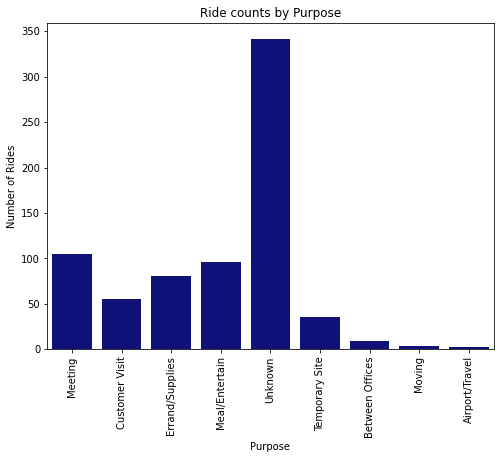

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(x='PURPOSE' , data=ride_data , color='darkblue')
plt.title('Ride counts by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 90)
plt.show()

Unknown Proceses : The high count of "Unknown" purposes suggests a potential area for improvement in data collection or recording. 

Common Purposes : "Meeting" , "Meal/Entertain" , and "Errand/Supplies" are common ride purposes .

Less Frequent Purposes: Purposes like "Moving," "Airport/Travel," "Commute," and "Charity" are less common, but still present in the dataset

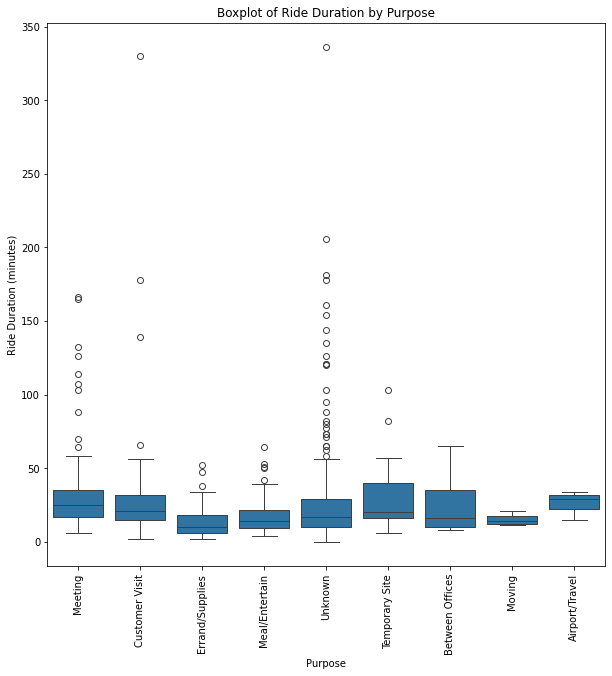

In [23]:
plt.figure(figsize=(10, 10))
sns.boxplot(x='PURPOSE', y='DURATION', data=ride_data )
plt.title('Boxplot of Ride Duration by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Ride Duration (minutes)')
plt.xticks(rotation = 90)
plt.show()

#### Analysis based on 'Category'

In [24]:
category_distribution = ride_data['CATEGORY'].value_counts()
print("Category Distribution: ")
print(category_distribution)

Category Distribution: 
Business    670
Personal     61
Name: CATEGORY, dtype: int64


In [25]:
descriptive_stats_by_category = ride_data.groupby('CATEGORY')['MILES'].describe()
print("Descriptive Statistics on Miles Covered grouped by Category : ")
print(descriptive_stats_by_category)

Descriptive Statistics on Miles Covered grouped by Category : 
          count       mean        std  min    25%  50%     75%    max
CATEGORY                                                             
Business  670.0  11.496866  24.137109  0.5  3.025  6.1  10.975  310.3
Personal   61.0   7.749180   8.476352  1.0  2.000  4.4  10.400   41.9


In [26]:
descriptive_stats_by_category = ride_data.groupby('CATEGORY')['DURATION'].describe()

print("Descriptive statistics on trip duration grouped by category : ")
print(descriptive_stats_by_category)

Descriptive statistics on trip duration grouped by category : 
          count       mean        std  min   25%   50%   75%    max
CATEGORY                                                           
Business  670.0  25.767164  31.271406  0.0  10.0  18.0  29.0  336.0
Personal   61.0  19.737705  16.129581  4.0   8.0  15.0  22.0   88.0


C:\Users\91932\AppData\Local\Temp\ipykernel_15296\115776778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CATEGORY' , data=ride_data , color='blue' , palette=custom_palette)


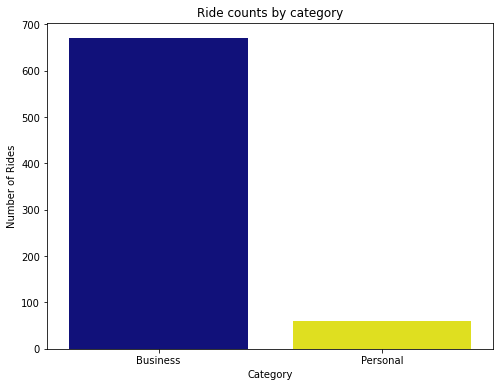

In [27]:
plt.figure(figsize=(8,6))
custom_palette = {"Business": "darkblue", "Personal": "yellow"}
sns.countplot(x='CATEGORY' , data=ride_data , color='blue' , palette=custom_palette)
plt.title('Ride counts by category')
plt.xlabel('Category')
plt.ylabel('Number of Rides')
plt.show()

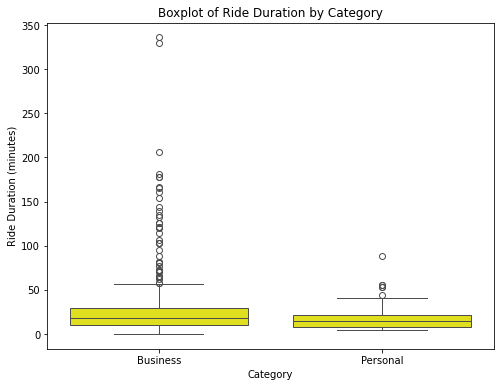

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='CATEGORY' , y='DURATION' , data = ride_data , color = 'yellow')
plt.title('Boxplot of Ride Duration by Category')
plt.xlabel('Category')
plt.ylabel('Ride Duration (minutes)')
plt.show()

#### Temporal Analysis


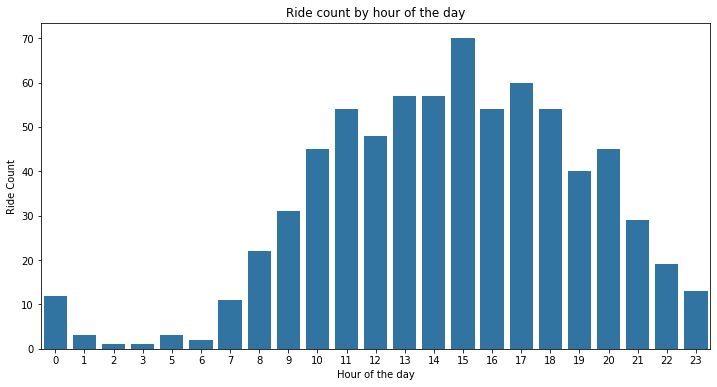

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(x='START_HOUR' , data = ride_data )
plt.title('Ride count by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Ride Count')
plt.show()

C:\Users\91932\AppData\Local\Temp\ipykernel_15296\2167054593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ride_data["TimeOfDay"] , palette = custom_palette)


Text(0, 0.5, 'Ride Count')

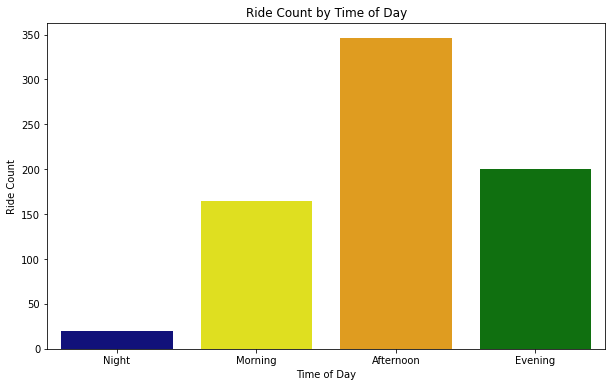

In [30]:
plt.figure(figsize=(10,6))
custom_palette = {"Night": "darkblue", "Morning": "yellow" , "Afternoon":"Orange", "Evening":"Green"}
sns.countplot(x=ride_data["TimeOfDay"] , palette = custom_palette)
plt.title('Ride Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Ride Count')

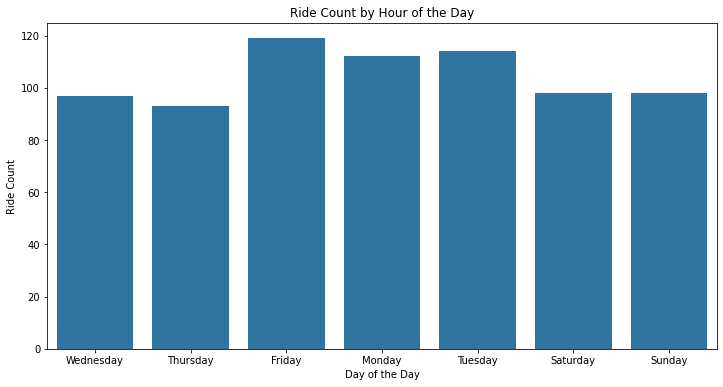

In [31]:
plt.figure(figsize=(12,6))
sns.countplot(x = 'DAY' , data = ride_data)
plt.title('Ride Count by Hour of the Day')
plt.xlabel('Day of the Day')
plt.ylabel('Ride Count')
plt.show()

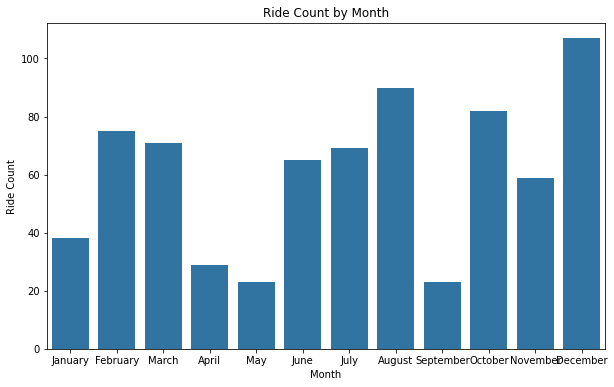

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='MONTH', data=ride_data)
plt.title('Ride Count by Month')
plt.xlabel('Month')
plt.ylabel('Ride Count')
plt.show()

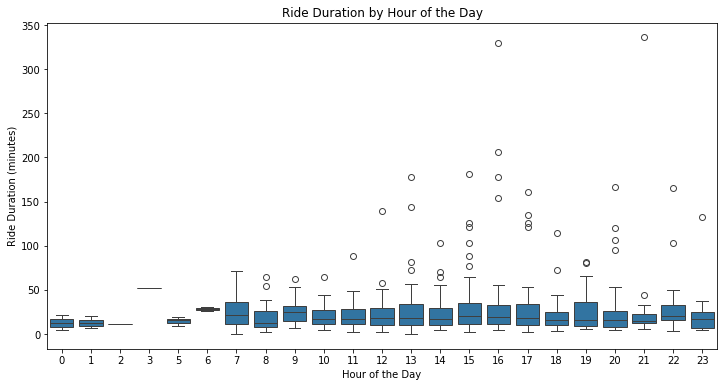

In [33]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='START_HOUR', y='DURATION', data=ride_data)
plt.title('Ride Duration by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Ride Duration (minutes)')
plt.show()

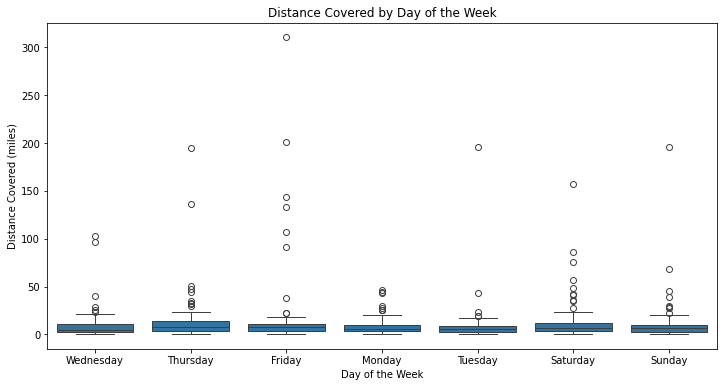

In [34]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='DAY', y='MILES', data=ride_data)
plt.title('Distance Covered by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Distance Covered (miles)')
plt.show()

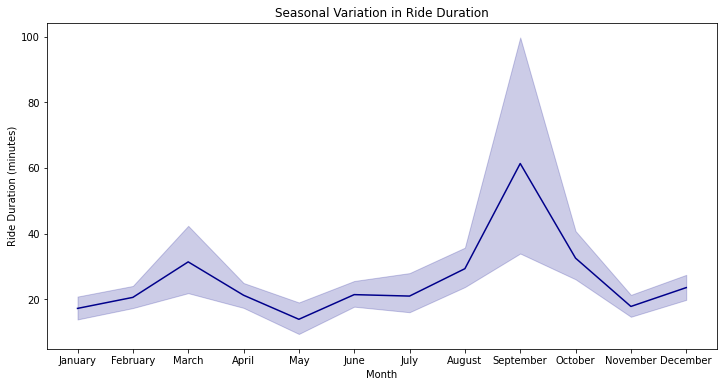

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='MONTH', y='DURATION', data=ride_data , color = 'darkblue')
plt.title('Seasonal Variation in Ride Duration')
plt.xlabel('Month')
plt.ylabel('Ride Duration (minutes)')
plt.show()

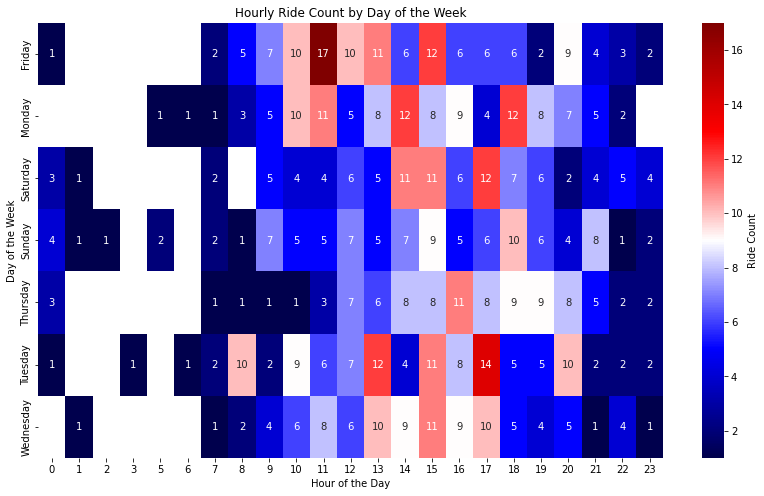

In [36]:
heatmap_data = ride_data.groupby(['DAY' , 'START_HOUR']).size().unstack()
plt.figure(figsize = (14,8))
sns.heatmap(heatmap_data , cmap = 'seismic' , annot = True , fmt='g' , cbar_kws={'label':'Ride Count'})
plt.title('Hourly Ride Count by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

#### Identifying Outliers

Text(0.5, 1.0, 'Outliers in Duration')

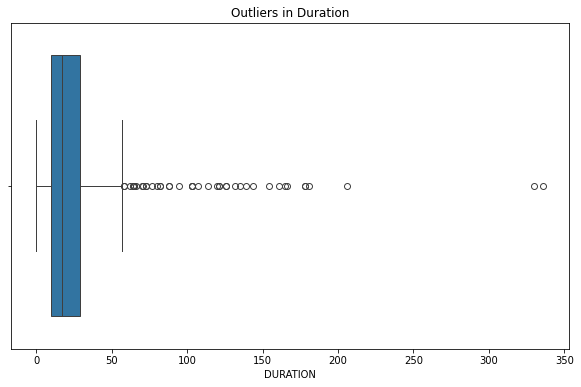

In [37]:
plt.figure(figsize = (10,6))
sns.boxplot(x=ride_data["DURATION"] , data = ride_data)
plt.title("Outliers in Duration")

Text(0.5, 1.0, 'Outliers in Miles')

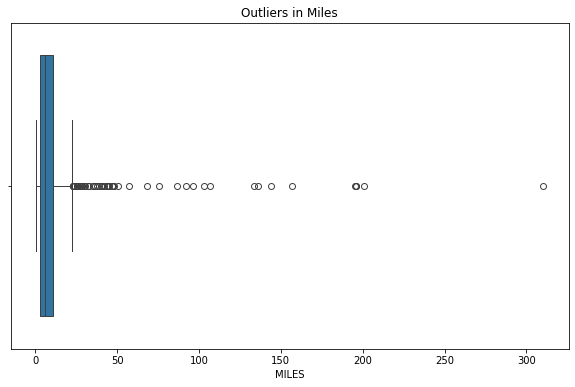

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=ride_data["MILES"], data = ride_data)
plt.title("Outliers in Miles")

#### Correlation Analysis

In [39]:
correlation_matrix = ride_data[['MILES' , 'DURATION']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
             MILES  DURATION
MILES     1.000000  0.862063
DURATION  0.862063  1.000000


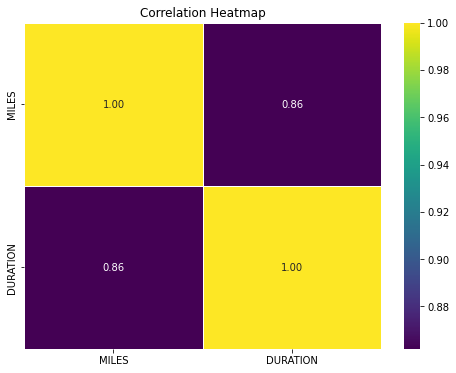

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix , annot = True , cmap = 'viridis' , fmt = '.2f' , linewidths = .5)
plt.title('Correlation Heatmap')
plt.show()

#### Distribution Analysis

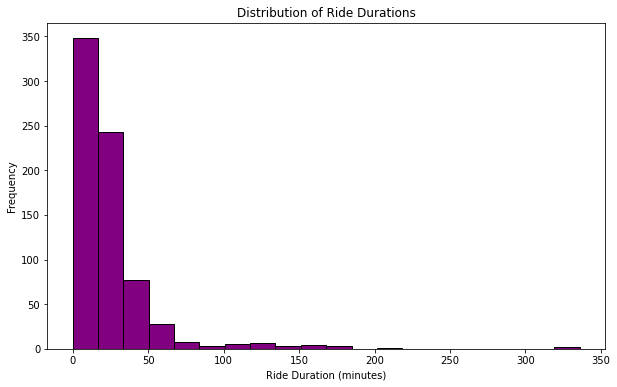

In [41]:
plt.figure(figsize = (10,6))
plt.hist(ride_data['DURATION'] , bins = 20 , color = 'purple' , edgecolor = 'black')
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

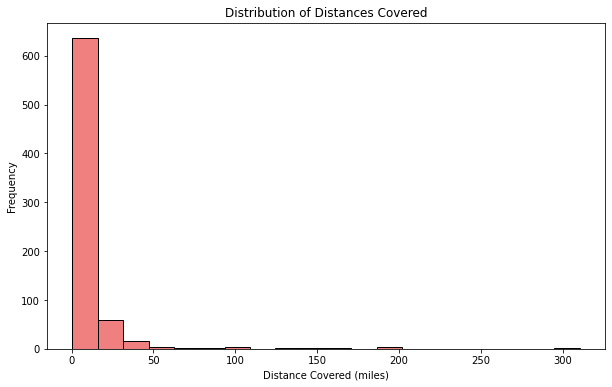

In [42]:
plt.figure(figsize=(10, 6))
plt.hist(ride_data['MILES'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Distances Covered')
plt.xlabel('Distance Covered (miles)')
plt.ylabel('Frequency')
plt.show()

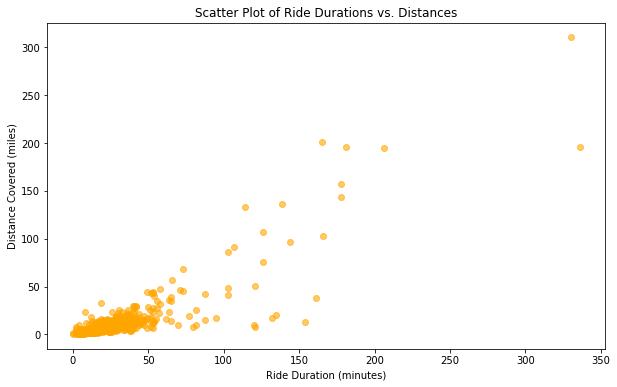

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(ride_data['DURATION'], ride_data['MILES'], alpha=0.6, color='orange')
plt.title('Scatter Plot of Ride Durations vs. Distances')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Distance Covered (miles)')
plt.show()

In [44]:
# Creating a pivot table with sum of 'MILES' for each 'TimeOfDay' period and 'PURPOSE'
pivot_table = ride_data.pivot_table(index = 'TimeOfDay' , columns = 'PURPOSE' , values = 'MILES' , aggfunc = 'sum' , fill_value = 0)
pivot_table

PURPOSE,Airport/Travel,Between Offices,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,Unknown
TimeOfDay,,,,,,,,,
Night,0.0,12.4,51.9,19.2,15.0,8.4,0.0,0.0,38.2
Morning,7.6,51.0,131.6,42.1,159.1,258.2,18.2,89.4,583.0
Afternoon,8.9,17.7,891.0,166.5,213.9,693.3,0.0,203.5,2226.3
Evening,0.0,17.5,157.6,86.5,209.3,761.9,0.0,122.2,914.2


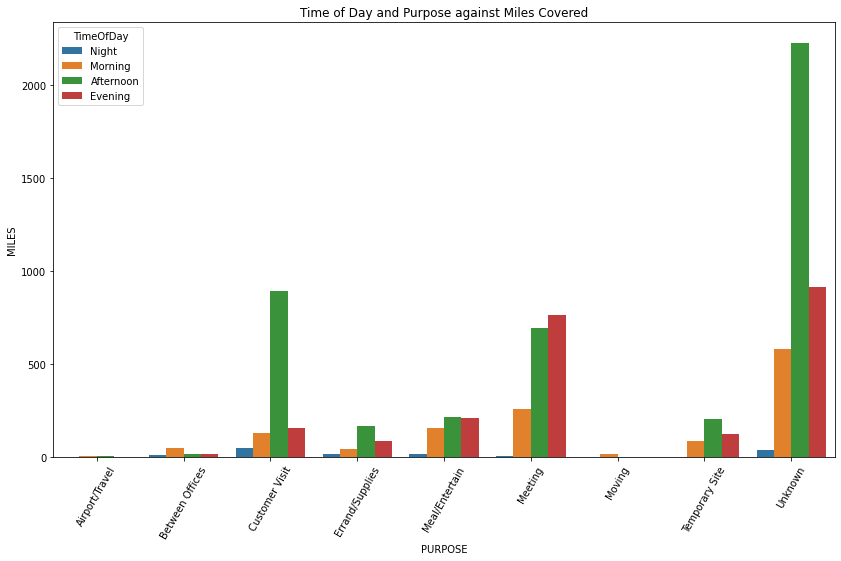

In [45]:
# Converting the Dictionary into dataframe
df_pivot = pd.DataFrame(pivot_table)

# Melting the vizualization to work with Seaborn
df_melted = df_pivot.reset_index().melt(id_vars = 'TimeOfDay' , var_name = 'PURPOSE' , value_name = 'MILES')

plt.figure(figsize = (14,8))
sns.barplot(x = 'PURPOSE' , y = 'MILES' , hue = 'TimeOfDay' , data = df_melted)
plt.xticks(rotation = 60)
plt.xlabel('PURPOSE')
plt.ylabel('MILES')
plt.legend(title = 'TimeOfDay')
plt.title("Time of Day and Purpose against Miles Covered")

plt.show()

C:\Users\91932\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Analysis : 
         MILES                                                            \
         count        mean        std   min   25%    50%      75%    max   
Cluster                                                                    
0        342.0    8.437427   8.562111   0.6   2.9    6.2   10.400   68.4   
1         16.0  141.662500  66.564614  37.7  95.1  134.8  195.375  310.3   
2        373.0    8.105630   8.179015   0.5   3.0    5.5   10.500   57.0   

          YEAR          ... START_HOUR       DURATION                         \
         count    mean  ...        75%   max    count        mean        std   
Cluster                 ...                                                    
0        342.0  2016.0  ...       13.0  14.0    342.0   20.713450  14.530776   
1         16.0  2016.0  ...       18.5  22.0     16.0  172.500000  69.198266   
2        373.0  2016.0  ...       20.0  23.0    373.0   23.120643  21.526526   

                                          

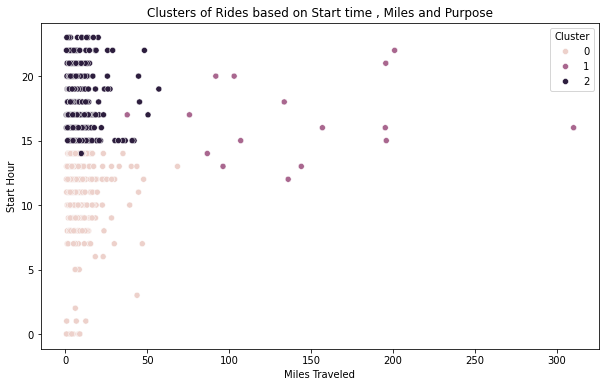

In [46]:
# Using Kmeans clustering to group rides based on similarities in features .

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Scaling the data 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ride_data[['START_HOUR' , 'MILES' , 'DURATION']])

# Performing K-means clustering 
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_data)

# Assigning cluster labels to data points
ride_data['Cluster'] = kmeans.labels_

# Grouping the data by cluster and calculate descriptive statistics
grouped_data = ride_data.groupby('Cluster')
print("Cluster Analysis : ")
print(grouped_data.describe())

# Vizualizing the clusters
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'MILES' , y = 'START_HOUR' , hue = 'Cluster' , data = ride_data)
plt.title('Clusters of Rides based on Start time , Miles and Purpose')
plt.xlabel('Miles Traveled')
plt.ylabel('Start Hour')
plt.show()

Explaination - 

The data was clustered into 3 distinct groups based on start hour , miles traveled , and purpose .

Each cluster exhibits unique characteristics in terms of these variables . 

Cluster O : This cluster is characterized by shorter trips (lower miles) that typically start during the morning and afternoon hours. The average duration of trips in this cluster is also relatively shorter. These trips are typically shorter in distance and duration , and they tend to start during the morning and afternoon hours. This suggests that these trips may be related to daily errand or commuting.

Cluster 1 : This cluster represents trips with moderate distances and start times spread across the day. The average duration of trips in this cluster falls between the other two clusters . These trips have moderate distances and durations , and they start at various times throughout the day. This suggests that these trips may be a mix of different types of activities , such as work_related travel , shopping , or leisure activities .

Cluster 2 : This cluster encompasses longer trips (higher miles) that mostly start during the evening and night hours. The average duration of trips in this cluster is the highest among all clusters. These trips are the longest in distance and duration , and they tend to start during the evening and night hours . This suggests that these trips may be related to social activities , such as going out to dinner or attending events .

In [47]:
# Calculating the percentage of rides in each cluster
cluster_percentages = (100 * ride_data.groupby('Cluster').size())/len(ride_data)

# Printing the cluster percentages
print("Cluster Percentages : ")
print(cluster_percentages)

# Analyzing the characteristics of each cluster 
for cluster in range(3):
    cluster_data = ride_data[ride_data['Cluster'] == cluster]
    
    # Calculating descriptive statistics 
    descriptive_stats = cluster_data.describe()
    
    # Printing the descriptive statistics 
    print("\n Cluster {} Descriptive Statistics : ".format(cluster))
    print(descriptive_stats)

Cluster Percentages : 
Cluster
0    46.785226
1     2.188782
2    51.025992
dtype: float64

 Cluster 0 Descriptive Statistics : 
            MILES    YEAR  START_HOUR    DURATION  Cluster
count  342.000000   342.0  342.000000  342.000000    342.0
mean     8.437427  2016.0   10.701754   20.713450      0.0
std      8.562111     0.0    3.124766   14.530776      0.0
min      0.600000  2016.0    0.000000    0.000000      0.0
25%      2.900000  2016.0    9.250000   10.000000      0.0
50%      6.200000  2016.0   11.000000   17.000000      0.0
75%     10.400000  2016.0   13.000000   28.000000      0.0
max     68.400000  2016.0   14.000000   88.000000      0.0

 Cluster 1 Descriptive Statistics : 
            MILES    YEAR  START_HOUR    DURATION  Cluster
count   16.000000    16.0   16.000000   16.000000     16.0
mean   141.662500  2016.0   16.562500  172.500000      1.0
std     66.564614     0.0    2.988171   69.198266      0.0
min     37.700000  2016.0   12.000000  103.000000      1.0
25%    


Top Purposes for Cluster 2:
Unknown            173
Meal/Entertain      61
Errand/Supplies     48
Name: PURPOSE, dtype: int64

Top Times of Day for Cluster 2:
Evening      195
Afternoon    178
Night          0
Name: TimeOfDay, dtype: int64


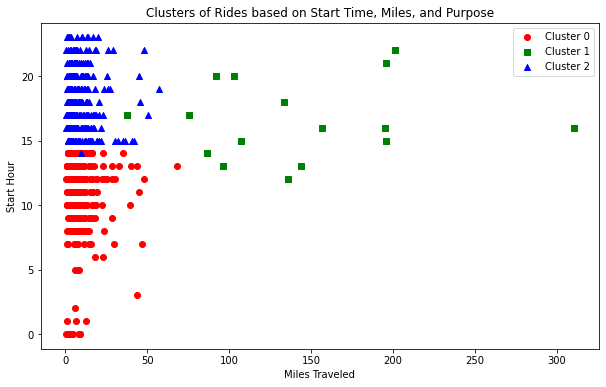

In [48]:
# Analyzing the most common purposes and time of day for each cluster

top_purposes = cluster_data['PURPOSE'].value_counts().head(3)
top_times = cluster_data['TimeOfDay'].value_counts().head(3)

# Printing the top purposes and time of day
print("\nTop Purposes for Cluster {}:".format(cluster))
print(top_purposes)
print("\nTop Times of Day for Cluster {}:".format(cluster))
print(top_times)

# Visualizing the clusters using different colors and markers 

plt.figure(figsize=(10, 6))
for cluster in range(3):
  cluster_data = ride_data[ride_data['Cluster'] == cluster]
  plt.scatter(cluster_data['MILES'], cluster_data['START_HOUR'], label='Cluster {}'.format(cluster), color=['red', 'green', 'blue'][cluster], marker=['o', 's', '^'][cluster])
plt.title('Clusters of Rides based on Start Time, Miles, and Purpose')
plt.xlabel('Miles Traveled')
plt.ylabel('Start Hour')
plt.legend()
plt.show()

#### Insights

- The most common purposes for ride-sharing are "Meeting" , "Meal/Entertain" , "Errand/Supplies" and "Customer Visit".
- Rides for "Meeting" and "Customer Visit" purposes tend to be longer in duration and distance , while rides for "Meal/Entertain" and "Errand/Supplies" are shorter.
- Ride counts are highest during the afternoon and evening hours , particularly for "Meeting" and "Meal/Entertain" purposes.
- Weekends have lower ride counts compared to weekdays.
- The average distance and duration of rides vary across different days of the week and time of day.

#### Recommendations

- Offer promotions or discounts during off-peak hours to increase ride utilization .
- Introduce loyalty programs or incentives for frequent riders .
- Develop targeted marketing campaigns based on ride purposes and user preferences.
- Collaborate with businesses and event organizers to offer tailored ride-sharing options for their customers or attendees.